# 단순한 케이스: 모든 특징의 타입이 같은 경우
---

# sklearn을 이용한 전처리 모델
---

1) 전처리 모델 (Preprocessing model)을 생성

2) 생성된 모델을 train data에 대해서 fitting (각 변수의 결측을 어떻게 처리할지 계산- 방식은 세부 모델별로 상이)

3) transform으로 앞서 계산한 방식으로 train data의 결측을 처리(replace)

4) train data에 적용한 것과 동일한 전처리 모델을 test data에도 적용 (test 데이터에는 fitting이 되지 않은 것이 차이점)

---
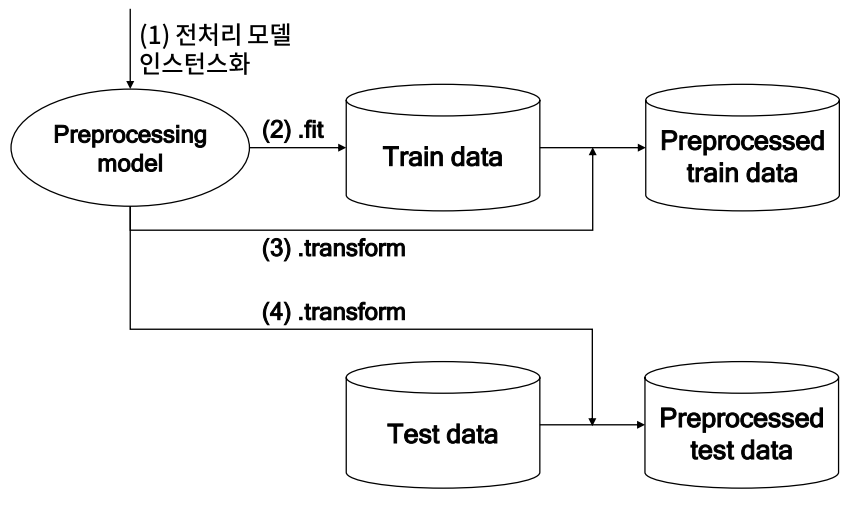

---
- 간혹 다른 분석 결과 코드를 보다보면, 전체 데이터를 전처리 모델에 fitting하는 경우가 있다. 이는 더 나은 성능을 기대할 수 있다.
- 하지만 이것은 test data를 알고있는 상태에서 검증(test)를 하는 것이나 마찬가지여서 객관적인 결과라 보기 어렵다.

In [1]:
import os
import pandas as pd

# 불필요한 경고 표시 생략
import warnings
warnings.filterwarnings(action = 'ignore')

a=%pwd # 현재 경로 a에 할당
os.chdir(a) # 파일 로드 경로 설정

In [2]:
df = pd.read_csv("cleveland.csv")

In [3]:
# 특징과 라벨 분리
X = df.drop('Output', axis = 1)
Y = df['Output']

In [4]:
# 학습 데이터와 평가 데이터로 분리
from sklearn.model_selection import train_test_split
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y)

In [5]:
# 결측치 확인
Train_X.isnull().sum()
# 결측치가 많지 않다.
# 지워도 무방한 수치이지만, 새로 들어온 데이터에 결측이 있을 수도 있다는 도메인 지식이 있다고 가정

Age         0
Sex         0
Cp          0
Trestbps    0
Chol        0
Fbs         0
Restecg     0
Thalach     0
Exang       0
Oldpeak     0
Slope       0
Ca          4
Thal        1
dtype: int64

In [6]:
# 평균 상관 계수 확인 (모든 변수가 연속형이므로 상관계수로 판단할 수 있는 것)
# -1 혹은 1에 가까울 수록 강한 상관관계를 갖는다.
# 좀 더 확실한 확인을 하고 싶다면 VIF 검증 등을 이용할 수 도 있다. 

Train_X.corr().sum() / (len(Train_X.columns) - 1)

# 수치가 높지 않다고 판단 => 특징 간 관계가 크지 않음 => 대표값 대체 활용 가능 판단

Age         0.167455
Sex         0.137927
Cp          0.088071
Trestbps    0.143565
Chol        0.129415
Fbs         0.113927
Restecg     0.144141
Thalach    -0.097450
Exang       0.157471
Oldpeak     0.182979
Slope       0.151491
Ca          0.166265
Thal        0.187830
dtype: float64

# 대표값으로 대체 (Simpleimpute)
---
- 가장 일반적으로 사용되는 결측치 대체법
- 다만, 사용하기 부적절한 경우가 2가지 있다.
    - 1) 소수 feature에 결측이 쏠린 경우
    - 2) 특징 간 상관성 (corr)이 큰 경우
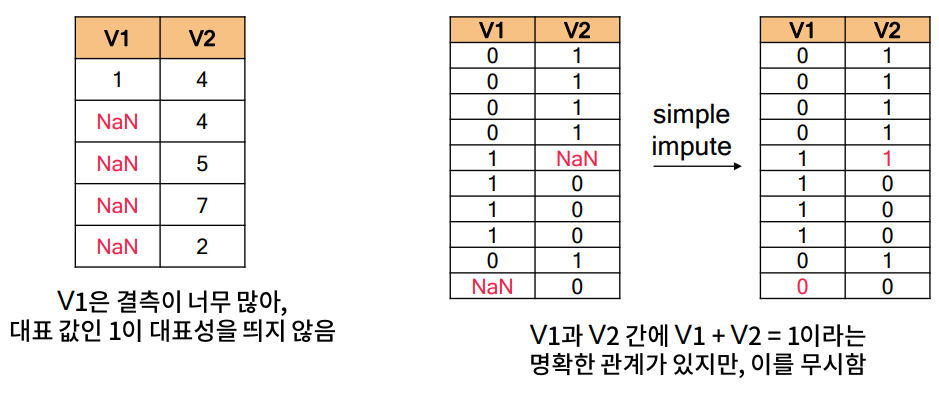

## 관련 문법 : sklearn.impute.SimpleImputer
---

- 결측이 있는 변수의 `대표값 으로 결측을 대체` 하는 함수
- 변수 타입에 따라 두 개의 대표 통계량을 같이 적용해야 할 때도 있다.

파라미터
- strategy : 대표 통계량을 지정 ('mean', 'most_frequent', 'median' 등)
---
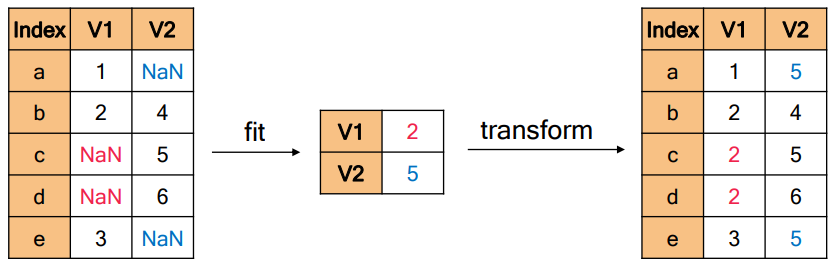

In [7]:
# 대표값을 활용한 결측치 대체
from sklearn.impute import SimpleImputer

# SimpleImputer 인스턴스화(Preprocessing model 생성)
# 평균치(mean)을 대표값으로 활용
SI = SimpleImputer(strategy = 'mean')

# 학습
SI.fit(Train_X)

# sklearn instance의 출력은 ndarray이기 때문에 다시 DataFrame으로 바꿔줘야 한다.
# Train / Test 모두에 동일한 모델을 적용시킨다.
Train_X = pd.DataFrame(SI.transform(Train_X), columns = Train_X.columns)
Test_X = pd.DataFrame(SI.transform(Test_X), columns = Test_X.columns)

In [8]:
Train_X.isnull().sum()

Age         0
Sex         0
Cp          0
Trestbps    0
Chol        0
Fbs         0
Restecg     0
Thalach     0
Exang       0
Oldpeak     0
Slope       0
Ca          0
Thal        0
dtype: int64

# 복잡한 케이스: 다른 타입의 특징이 있는 경우

In [9]:
df = pd.read_csv("saheart.csv")

In [10]:
# 특징과 라벨 분리
X = df.drop('Chd', axis = 1)
Y = df['Chd']

In [11]:
# 학습 데이터와 평가 데이터로 분리
from sklearn.model_selection import train_test_split
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y)

In [12]:
# 결측치 확인
Train_X.isnull().sum()
# 결측치가 많지 않음
# 지워도 무방한 수치이지만, 새로 들어온 데이터에 결측이 있을 수도 있다는 도메인 지식이 있다고 가정

Sbp          0
Tobacco      0
Ldl          0
Adiposity    0
Typea        0
Obesity      6
Alcohol      6
Age          0
Famhist      5
dtype: int64

In [13]:
# 평균 상관 계수 확인 (주의: 모든 변수가 연속형이므로 가능한 접근)
Train_X.corr().sum() / (len(Train_X.columns) - 1)

# 수치가 높지 않다고 판단 => 특징 간 관계가 크지 않음 => 대표값 대체 활용 가능 판단
# 실제로는 데이터가 연속형 / 범주형이 섞여 있기 때문에 corr만 가지고 판단할 수는 없다.
# 통계분석(ANOVA검증, 피어슨 검정 등)을 통해 관계에 대한 판단을 해야 한다. 
# 하지만 실습을 위해 일단 그냥 진행

Sbp          0.313640
Tobacco      0.229318
Ldl          0.310346
Adiposity    0.433772
Typea        0.131338
Obesity      0.379262
Alcohol      0.216724
Age          0.382310
Famhist      0.262028
dtype: float64

## 두 개의 대표값을 동시에 적용하여 대체

In [14]:
# Famhist: 범주형 변수
# 그 외 변수: 연속형 변수

# 대표값을 평균을 사용할지, 최빈값을 사용할지 결정이 어렵다. => 둘 다 사용해야 함
# 이를 위해 데이터를 분할해야 한다

# 범주형 변수 분리
Train_X_cate = Train_X[['Famhist']]
Train_X_cont = Train_X.drop('Famhist', axis = 1)

Test_X_cate = Test_X[['Famhist']]
Test_X_cont = Test_X.drop('Famhist', axis = 1)

In [ ]:
# 대표값을 활용한 결측치 대체
from sklearn.impute import SimpleImputer

# SimpleImputer 인스턴스화(Preprocessing model 생성)
# 평균치와 최빈값에 대한 모델 각각 생성

SI_mode = SimpleImputer(strategy = 'most_frequent')
SI_mean = SimpleImputer(strategy = 'mean')

# 학습
SI_mode.fit(Train_X_cate)
SI_mean.fit(Train_X_cont)

# sklearn instance의 출력은 ndarray이기 때문에 다시 DataFrame으로 바꿔줘야 한다.
# Train / Test 모두에 동일한 모델을 적용시킨다.

#최빈값 모델 적용
Train_X_cate = pdd.DataFrame(SI_mode.transform(Train_X_cate),
                            columns = Train_X_cate.columns)

Test_X_cate = pd.DataFrame(SI_mode.transform(Test_X_cate),
                           columns = Test_X_cate.columns)

#평균값 모델 적용
Train_X_cont = pd.DataFrame(SI_mean.transform(Train_X_cont),
                            columns = Train_X_cont.columns)

Test_X_cont = pd.DataFrame(SI_mean.transform(Test_X_cont),
                           columns = Test_X_cont.columns)

In [15]:
# 다시 두 데이터를 concat으로 이어 붙인다.
# '열' 로 붙이기 때문에 axis =1
# 컬럼명이 살아 있어야 하기 때문에 ignore_index=False (default)

Train_X = pd.concat([Train_X_cate, Train_X_cont], axis = 1)
Test_X = pd.concat([Test_X_cate, Test_X_cont], axis = 1)

In [16]:
Train_X.isnull().sum()

Famhist      0
Sbp          0
Tobacco      0
Ldl          0
Adiposity    0
Typea        0
Obesity      0
Alcohol      0
Age          0
dtype: int64

# Tip. 
---
- 이진형 변수와 연속형 변수만 포함된 경우에는 SI_mean만 사용하여 결측치를 평균으로 대체한 뒤에, 이진형 변수에 대해서만 round 처리를 하면 하나의 전처리 모델만 사용할 수 있다.
---
- 이진형 변수( 0 또는 1) 의 평균 = 1의 비율 이다.
- 만약 이진형 변수의 mean이 0.4(예시) 이면 -> "0이 더 많다"
- 만약 이진형 변수의 mean이 0.7(예시) 이면 -> "1이 더 많다"
- 해당 값들을 round해주면 0.5 미만이면 0이되고, 0.5 이상이면 1이 된다.